# Исследование "Определение наиболее прибыльного тарифа"

<strong>Описание проекта:</strong> отдел маркетинга попросил проанализировать, какой тариф наиболее прибылен для компании. Это нужно, что скорректировать инвестиции в рекламу

<strong>Цель проекта:</strong> на небольшой выборке проанализировать поведение клиентов и понять, какой тариф приносит больше выручки

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Исследование-&quot;Определение-наиболее-прибыльного-тарифа&quot;" data-toc-modified-id="Исследование-&quot;Определение-наиболее-прибыльного-тарифа&quot;-1">Исследование "Определение наиболее прибыльного тарифа"</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Изучение-данных-и-предобработка" data-toc-modified-id="Изучение-данных-и-предобработка-1.0.1">Изучение данных и предобработка</a></span><ul class="toc-item"><li><span><a href="#Таблица-calls" data-toc-modified-id="Таблица-calls-1.0.1.1">Таблица calls</a></span></li><li><span><a href="#Таблица-internet" data-toc-modified-id="Таблица-internet-1.0.1.2">Таблица internet</a></span></li><li><span><a href="#Таблица-messages" data-toc-modified-id="Таблица-messages-1.0.1.3">Таблица messages</a></span></li><li><span><a href="#Таблица-tariffs" data-toc-modified-id="Таблица-tariffs-1.0.1.4">Таблица tariffs</a></span></li><li><span><a href="#Таблица-users" data-toc-modified-id="Таблица-users-1.0.1.5">Таблица users</a></span></li></ul></li><li><span><a href="#Расчет-показателей-и-подготовка-данных-к-анализу" data-toc-modified-id="Расчет-показателей-и-подготовка-данных-к-анализу-1.0.2">Расчет показателей и подготовка данных к анализу</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-1.0.3">Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-1.0.4">Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются" data-toc-modified-id="Средняя-выручка-пользователей-тарифов-«Ультра»-и-«Смарт»-различаются-1.0.4.1">Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются</a></span></li><li><span><a href="#Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов" data-toc-modified-id="Средняя-выручка-пользователей-из-Москвы-отличается-от-выручки-пользователей-из-других-регионов-1.0.4.2">Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-1.0.5">Общие выводы</a></span></li></ul></li></ul></li></ul></div>

### Изучение данных и предобработка

In [1]:
import pandas as pd
import math
import numpy as np
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv')
df_internet = pd.read_csv('/datasets/internet.csv')
df_messages = pd.read_csv('/datasets/messages.csv')
df_tariffs = pd.read_csv('/datasets/tariffs.csv')
df_users = pd.read_csv('/datasets/users.csv')

#### Таблица calls

In [3]:
df_calls.info()
df_calls.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


Итак, первая таблица `calls` состоит из 4 столбцов:
* `id` - уникальный номер звонка;
* `call_date` - дата звонка;
* `duration` - длительность звонка в минутах;
* `user_id` - идентификатор пользователя, сделавшего звонок

Выбивающихся значений нет, пропущенных значений тоже, однако для задачи стоит перевести длительность звонка в целочисленный тип данных с округлением 'вверх'. Это позволит точнее рассчитать списываемые оператором минуты. Также стоит перевести столбец `call_date` в форматы даты

Оценим распределение длительности звонков:

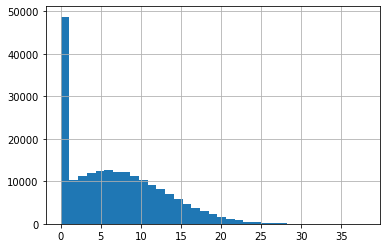

In [4]:
df_calls['duration'].hist(bins=35)
None

Многие звонки длятся не более минуты. Аномалий не найдено

In [5]:
df_calls['duration'] = np.ceil(df_calls['duration'])
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format="%Y-%m-%d")
df_calls = df_calls.drop_duplicates().reset_index(drop=True)
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


Все столбцы переведены в нужный формат, дубликатов не найдено

#### Таблица internet

In [6]:
df_internet.info()
df_internet.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,mb_used,user_id
count,149396.000000,149396.000000,149396.000000
mean,74697.500000,370.192426,1252.099842
std,43127.054745,278.300951,144.050823
min,0.000000,0.000000,1000.000000
25%,37348.750000,138.187500,1130.000000
50%,74697.500000,348.015000,1251.000000
75%,112046.250000,559.552500,1380.000000
max,149395.000000,1724.830000,1499.000000


Проверим распределение значений таблицы:

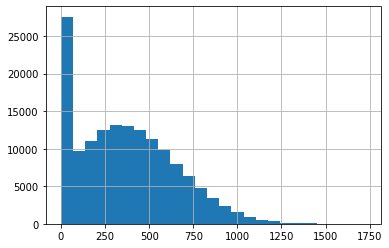

In [7]:
df_internet['mb_used'].hist(bins=25)
None

Часто всего встречаются пользователи, которые почти не пользуются интернетом. Аномалий не найдено

In [8]:
df_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Итак, вторая таблица `internet` состоит из 5 столбцов:
* `Unnamed: 0` - вероятно, технический столбец, который дублирует индексы. Скорее всего, использовался для генерации 'id';
* `id` - уникальный номер сессии;
* `md_used` - объём потраченного за сессию интернет-трафика (в мегабайтах);
* `session_date` - дата интернет-сессии
* `user_id` - идентификатор пользователя

Выбивающихся значений нет, пропущенных значений тоже, столбец `Unnamed: 0` не нужен для задачи. Столбец `session_date` стоит перевести в форматы даты

In [9]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format="%Y-%m-%d")
df_internet = df_internet.drop_duplicates().reset_index(drop=True)
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    149396 non-null  int64         
 1   id            149396 non-null  object        
 2   mb_used       149396 non-null  float64       
 3   session_date  149396 non-null  datetime64[ns]
 4   user_id       149396 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 5.7+ MB


Все столбцы переведены в нужный формат, дубликатов не найдено

#### Таблица messages

In [10]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Итак, третья таблица `messages` состоит из следующих столбцов:
* `id` - уникальный номер сообщения
* `message_date` - дата сообщения
* `id` - идентификатор пользователя, отправившего сообщение

В таблице нет пропущенных значений. Столбец `message_date` стоит перевести в формат дат:

In [11]:
df_messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format="%Y-%m-%d")
df_messages = df_messages.drop_duplicates().reset_index(drop=True)
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


Все столбцы переведены в нужный формат, дубликатов не найдено

#### Таблица tariffs

In [13]:
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Итак, четвертая таблица `tariffs` состоит из 8 столбцов:
* `messages_included` - количество сообщений в месяц, включённых в абонентскую плату
* `mb_per_month_included` - объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)
* `minutes_included` - количество минут разговора в месяц, включённых в абонентскую плату
* `rub_monthly_fee` - ежемесячная абонентская плата в рублях
* `rub_per_gb` - стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)
* `rub_per_message` - стоимость отправки сообщения сверх тарифного пакета
* `rub_per_minute` - стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)
* `tariff_name` - название тарифа

Пропущенных значений нет, все форматы соответствуют логике их использования. Для удобства стоит переименовать название последнего столбца в `tariff` - это позволит проще объединять таблицы

In [14]:
df_tariffs.rename(columns={'tariff_name': 'tariff'}, inplace=True)

#### Таблица users

In [15]:
df_users.head()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Итак, пятая таблица `users` состоит из 8 столбцов:
* `user_id` - уникальный идентификатор пользователя
* `age` - возраст пользователя (годы)
* `churn_date` - дата прекращения пользования тарифом
* `city` - город проживания пользователя
* `first_name` - имя пользователя
* `last_name` - фамилия пользователя
* `reg_date` - дата подключения тарифа (день, месяц, год)
* `tariff` - название тарифа

Столбцы `churn_date` и `reg_date` стоит перевести в формат даты:

In [16]:
df_users[['churn_date', 'reg_date']] = df_users[['churn_date', 'reg_date']].apply(pd.to_datetime, format="%Y-%m-%d", errors='coerce')
df_users = df_users.drop_duplicates().reset_index(drop=True)
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Все столбцы переведены в нужный формат, дубликатов не найдено

Дополнительно можно проверить, нет ли опечаток и неявных дубликатов в столбце `city`

In [17]:
df_users['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

Неявных дубликатов не найдено

### Расчет показателей и подготовка данных к анализу

Перед подсчетом данных стоит проверить, сколько лет включено в выборку:

In [18]:
df_calls['year'] = df_calls['call_date'].dt.year
df_calls['year'].unique()

array([2018])

Только один - 2018. Можно не сегментировать данные по годам

In [19]:
df_calls.drop('year', axis=1)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000
...,...,...,...,...
202602,1499_215,2018-12-26,1.0,1499
202603,1499_216,2018-10-18,19.0,1499
202604,1499_217,2018-11-10,11.0,1499
202605,1499_218,2018-10-06,5.0,1499


Многие из таблиц не нужны в исходном виде, можно перезаписать на них агрегированные данные. Для того, чтобы посчитать все данные помесячно, нужно добавить столбец `month` в таблицы `calls`, `internet`, `messages`

In [20]:
#Добавляем месяцы в таблицы:
df_calls['month'] = df_calls['call_date'].dt.month
df_internet['month'] = df_internet['session_date'].dt.month
df_messages['month'] = df_messages['message_date'].dt.month
#Агрегируем звонки, так как мы округляли вверх, то можно суммировать полученные значения:
df_calls = df_calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc=['sum', 'count'])
#Агрегируем таблицу с интернет трафиком:
df_internet = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
#Агрегируем таблицу с сообщениями:
df_messages = df_messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')


Теперь можно перейти к объединению таблиц. Для начала объединяю звонки, интернет-трафик и сообщения в единую таблицу:

In [21]:
join_frames = [df_internet, df_messages]
df_full = df_calls.join(join_frames, how='outer').reset_index().fillna(0)
df_full.columns = ['user_id', 'month', 'minutes','calls', 'mb_used', 'messages_sent']
df_full.head()

,user_id,month,minutes,calls,mb_used,messages_sent
0,1000,5,159.0,22.0,2253.49,22.0
1,1000,6,172.0,43.0,23233.77,60.0
2,1000,7,340.0,47.0,14003.64,75.0
3,1000,8,408.0,52.0,14055.93,81.0
4,1000,9,466.0,58.0,14568.91,57.0


Чтобы присвоить пользователю тот или иной тариф, стоит проверить, не мог ли один и тот же пользователь использовать два тарифа в течение изучаемого периода:

In [22]:
df_users.pivot_table(index='user_id', values='tariff', aggfunc='count')['tariff'].unique()

array([1])

Каждому `user_id` присвоен только один тариф. Можно объединить оставшиеся таблицы:

In [23]:
#Добавляем название тарифа каждой строке основного фрейма
df_full = pd.merge(df_full, df_users, how='left', on='user_id')
#Добавляем информацию о тарифе каждой строке основного фрейма
df_full = pd.merge(df_full, df_tariffs, how='left', on='tariff')

Теперь необходимо создать функцию, которая будет считать выручку от пользователя по каждой строке:

In [24]:
def revenue_counter(raw):
    revenue = raw['rub_monthly_fee']
    if raw['minutes'] > raw['minutes_included']:
        revenue += (raw['minutes'] - raw['minutes_included']) * raw['rub_per_minute']
    if raw['messages_sent'] > raw['messages_included']:
        revenue += (raw['messages_sent'] - raw['messages_included']) * raw['rub_per_message']
    if raw['mb_used'] > raw['mb_per_month_included']:
        revenue += np.ceil((raw['mb_used'] - raw['mb_per_month_included']) / 1024) * raw['rub_per_gb']
    return revenue

In [25]:
df_full['revenue'] = df_full.apply(revenue_counter, axis=1)

Итак, в результате объединений таблиц и дополнительных расчетов мы получили таблицу `df_full`, в которой в разбивке по месяцам есть следующая информация:
* объем предоставленных услуг (совокупная округленная длительность звонков, количество звонков, объем интернет-трафика, количество сообщений)
* личная информация о пользователе
* название и условия тарифа
* месячная выручка с пользователя

### Анализ данных

Стоит начать с изучения данных в разрезе каждого тарифа:

In [26]:
tariff_table = df_full.pivot_table(index='tariff', values=['minutes', 'mb_used', 'messages_sent', 'revenue']).astype('int')
tariff_table

,mb_used,messages_sent,minutes,revenue
tariff,,,,
smart,16208,33,417,1289
ultra,19468,49,526,2070


Итак, в среднем пользователи тарифа `ultra` пользуются услугами оператора активнее:

In [27]:
tariff_table.loc['ultra'] / tariff_table.loc['smart']

mb_used          1.201135
messages_sent    1.484848
minutes          1.261391
revenue          1.605896
dtype: float64

В среднем на одного пользователя в месяц:
* тариф `ultra` приносит на 61% больше выручки по сравнению с тарифом `smart`
* с тарифом `ultra` на 48% чаще отправляют сообщения
* с тарифом `ultra` используют на 26% больше минут
* с тарифом  `ultra` используют на 20% больше интернета

Чтобы автоматизировать построение диаграмм, стоит создать функцию, которая будут отображать гистограммы в зависимости от значения:

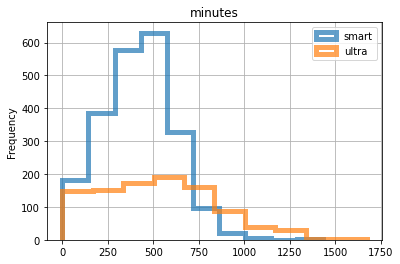

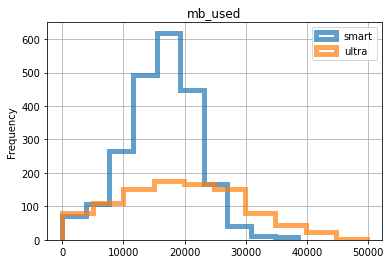

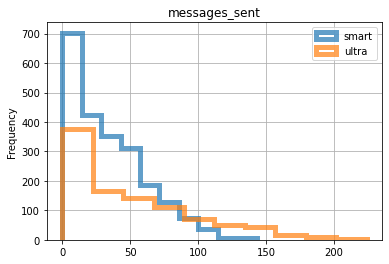

In [28]:
def tariff_hist(value):
    pivot_smart = (df_full
                   .query('tariff == "smart"')
                   [['user_id', value]]
                  )
    pivot_ultra = (df_full
                   .query('tariff == "ultra"')
                   [['user_id', value]]
                  )
    
    hist_smart = pivot_smart.plot(
        kind='hist',
        y=value,
        histtype='step',
        bins=10,
        linewidth=5,
        alpha=0.7,
        label='smart'
    )

    pivot_ultra.plot(
        kind='hist',
        y=value,
        histtype='step',
        bins=10,
        linewidth=5,
        alpha=0.7,
        label='ultra',
        ax=hist_smart,
        grid=True,
        legend=True,
        title=value
    )


df_full_values = ['minutes', 'mb_used', 'messages_sent']


for df_full_value in df_full_values:
    tariff_hist(df_full_value)

Описание распределений:
* `minutes`: распределение похоже на симметричное. Медиана тарифа `ultra` находится правее относительно тарифа `smart`, а размах выборки значительно больше
* `mb_used`: распределение также похоже на симметричное. Медианы тарифа `ultra` и `smart` существенно не различаются, а размах выборки тарифа `ultra` значительно больше
* `messages_sent` - распределение не симметрично. Это связано с тем, что пользователи всё реже и реже пользуются сообщениями. Медианы обоих тарифов совпадают, а у тарифа `ultra` более высокое стандартное отклонение

Стоит отметить, что пользователей с тарифом `smart` значительно больше. Дополнительные расчёты позволят подтвердить, что у тарифа `ultra` все показатели обладают более высоким стандартным отклонением

In [29]:
tariff_list = ['smart', 'ultra']



def statstic_counter(value, tariff):
    var = np.var(df_full.query('tariff == @tariff')[value], ddof=1)
    std = var ** .5
    mean = df_full.query('tariff == @tariff')[value].mean()
    median = df_full.query('tariff == @tariff')[value].median()
    stat_list['var'].append(var)
    stat_list['std'].append(std)
    stat_list['mean'].append(mean)
    stat_list['median'].append(median)
    
for tariff in tariff_list:
    stat_list = {'var' : [], 'std' : [], 'mean' : [], 'median' : [] }
    for df_full_value in df_full_values:
        statstic_counter(df_full_value, tariff)
    print(tariff, ':')
    display(pd.DataFrame(data=stat_list, index=df_full_values).astype('int'))

smart :


,var,std,mean,median
minutes,36219,190,417,422
mb_used,34462496,5870,16208,16506
messages_sent,796,28,33,28


ultra :


,var,std,mean,median
minutes,100873,317,526,518
mb_used,101751013,10087,19468,19308
messages_sent,2285,47,49,38


Гипотеза подтвердилась - у тарифа `ultra` более высокое стандартное отклонение и дисперсия. Эта информация будет полезна для проверки гипотез

### Проверка гипотез

#### Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются

Формулируем нулевую и альтернативную гипотезы: 
* `H₀`: среднемесячная выручка на одного пользователя тарифа `smart` равна аналогичному показателю тарифа `ultra`;
* `H₁`: среднемесячная выручка на одного пользователя тарифа `smart` не равна аналогичному показателю тарифа `ultra`;

Гипотезу можно сформулировать с помощью кода:
* `H₀`: df_full.query('tariff == "smart"').mean() == df_full.query('tariff == "ultra"').mean()
* `H₁`: df_full.query('tariff == "smart"').mean() != df_full.query('tariff == "ultra"').mean()

Так как значения могут различаться в разную сторону, тест будет двусторонним. Стоит учесть, что выборки разные по размеру, а дисперсии отличаются по размеру:

In [30]:
smart_count = df_full.query('tariff == "smart"')['user_id'].count()
ultra_count = df_full.query('tariff == "ultra"')['user_id'].count()
print('Размер выборки тарифа smart:', smart_count,
      ', Размер выборки тарифа ultra:', ultra_count)

Размер выборки тарифа smart: 2229 , Размер выборки тарифа ultra: 985


In [31]:
df_smart = df_full.query('tariff == "smart"')['revenue']

df_ultra = df_full.query('tariff == "ultra"')['revenue']

alpha = 0.01

results = st.ttest_ind(df_smart, df_ultra, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.2606313931076085e-250
Отвергаем нулевую гипотезу


Можно сформулировать новую гипотезу, при которой тариф ultra отличается от smart в бОльшую сторону: 
* `H₀`: среднемесячная выручка на одного пользователя тарифа `smart` равна аналогичному показателю тарифа `ultra`;
* `H₁`: среднемесячная выручка на одного пользователя тарифа `smart` меньше аналогичного показателя тарифа `ultra`;

In [32]:
print('p-значение:', results.pvalue / 2)

if (results.pvalue / 2 < alpha) and (df_ultra.mean() > df_smart.mean()):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.1303156965538042e-250
Отвергаем нулевую гипотезу


Можно утверждать, что вероятность, при которой тариф ultra будет приносить меньше или столько же дохода, что и тариф smart, очень низка

#### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

Формулируем нулевую и альтернативную гипотезы: 
* `H₀`: среднемесячная выручка на одного пользователя в Москве равна аналогичному показателю других городов;
* `H₁`: среднемесячная выручка на одного пользователя в Москве не равна аналогичному показателю других городов;

Гипотезу можно сформулировать с помощью кода:
* `H₀`: df_full.query('city == "Москва"').mean() == df_full.query('city != "Москва"').mean()
* `H₁`: df_full.query('city == "Москва"').mean() != df_full.query('city != "Москва"').mean()

Так как значения могут различаться в разную сторону, тест будет двусторонним:

In [33]:
df_msk = df_full.query('city == "Москва"')['revenue']

df_regions = df_full.query('city != "Москва"')['revenue']

alpha = 0.01

results = st.ttest_ind(df_msk, df_regions)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Не удалось подтвердить гипотезу, при которой доход жителей Москвы отличается от дохода жителей из других регионов

### Общие выводы

Выполненные блоки работ:
* Выполнена предобработка данных, данные переведены в нужный формат, проведена проверка на наличие аномалий и дубликатов
* Данные агрегированы по месяцам и объединены в единую таблицу, посчитана помесячная выручка для каждого пользователя
* Проведено исследование: изучено распределение объемов предоставляемых услуг по каждому тарифу, проведен сравнительный анализ между тарифами
* Сформулированы и проверены две гипотезы

В результате исследования было выявлено:

* В среднем в месяц пользователи тарифа `smart` используют 417 минут звонков, отправляют 33 сообщения и тратят 16208 мб интернета
* В среднем в месяц пользователи тарифа `ultra` используют 526 минут звонков, отправляют 49 сообщений и тратят 19468 мб интернета
* Пользователей тарифа `smart` больше по сравнению с пользователями `ultra` более чем в 2 раза
* Замечена более высокая вариативность показателей звонков, сообщений и интернета в тарифе `ultra`. Замечена более высокая дисперсия и стандартное отклонение по сравнению с тарифом `smart`

В результате проверки гипотез было выявлено:

* Средний доход на пользователя тарифа `ultra` с высокой долей вероятности не равен аналогичному показателю тарифа `smart`
* Средний доход на пользователя тарифа `ultra` с высокой долей вероятности выше аналогичного показателя тарифа `smart`
* Не удалось опровергнуть гипотезу о том, что средняя доходность на одного пользователя в Москве отличается от аналогичного показателя в регионах

Самый выгодный тариф:
* С точки зрения удельной выручки тариф `ultra` можно считать более выгодным, ведь среднемесячная выручка этого тарифа выше по сравнению с тарифом `smart` более чем на 60%, а объём предоставляемых услуг - всего на 26% по звонкам, 48% по сообщениям и 20% по интернет-трафику. Для более детальной оценки рентабельности стоит оценить расходы на предоставление услуг клиентам тарифов
* Пользователи тарифа smart более выгодны с точки зрения абсолютной выручки - пользователей, которые пользуются тарифом `smart` больше более чем в 2 раза

Рекомендации:
* Для более точной оценки выгоды того или иного тарифа рекомендуем также оценить сроки жизни клиентов по каждому тарифу и оценить сопутствующие расходы на привлечение и удержание клиентов
* Для оценки рентабельности стоит также оценить расходы компании на предоставление услуг по тарифам